# Python Searching Algorithms
#### Matthew Farkas
*1/19/16*

In [2]:
import random
import timeit
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
%matplotlib inline

In [508]:
# Test python's sorted() fn
temp = [x for x in range(10)]
# temp.append("hey") # Casues errors
random.shuffle(temp)

print(temp)
print(sorted(temp)) # errs
print(sorted(temp, key=int, reverse=True)) # errs

[6, 2, 5, 0, 7, 3, 1, 4, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


### Merge Sort

In [514]:
def merge_sort(iterable_to_sort, key=None, reverse=False, num_comparisons=0):
    
    # Start timer
    t0 = time.time()
    
    if key == None:
        def key(something):
            '''
                This is a default function that returns the comparable item
                in the case that a key is not specified.
            '''
            return something

    if len(iterable_to_sort) in [0,1]: # Handles empty arrays as well as 1-length
        return iterable_to_sort, num_comparisons, t0
    else:
        m1, c1, _ = merge_sort(iterable_to_sort[:len(iterable_to_sort)//2], key, reverse, num_comparisons)
        m2, c2, _ = merge_sort(iterable_to_sort[len(iterable_to_sort)//2:], key, reverse, num_comparisons)
        return merge_two(m1, m2, key, reverse, c1 + c2) + [time.time()-t0]

def merge_two(arr1, arr2, key, reverse, num_comparisons):
    '''
        This function merges two previously sorted lists.
        It's possible that each list only has one element.
    '''
    final = []
    while arr1:
        if arr2 and not in_order(arr1[0], arr2[0], key, reverse):
            num_comparisons += 1
            final.append(arr2.pop(0))
        elif arr2:
            num_comparisons += 1
            final.append(arr1.pop(0))
        else:
            final += arr1
            break
    return [final + arr2, num_comparisons]
    
def in_order(item1, item2, key, reverse):
    '''
        This function compares two values based on key and reverse inputs.
    '''
    if (key(item1) > key(item2) and not reverse) or\
            (key(item1) < key(item2) and reverse):
        return False
    else:
        return True

In [515]:
temp = [x for x in range(10)]
random.shuffle(temp)
print(temp)
print(merge_sort(temp))
print(merge_sort(temp, reverse=True))
print(merge_sort(['hey', 'there', 'bob']))
print(merge_sort([(1,2), (0,5), (7,7), (300, 400)], key=lambda x: x[1], reverse=True))

[9, 2, 3, 8, 0, 6, 5, 7, 4, 1]
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 24, 0.00011205673217773438]
[[9, 8, 7, 6, 5, 4, 3, 2, 1, 0], 23, 5.698204040527344e-05]
[['bob', 'hey', 'there'], 3, 1.1205673217773438e-05]
[[(300, 400), (7, 7), (0, 5), (1, 2)], 4, 1.6927719116210938e-05]


### Bubble Sort

In [330]:
def bubble_sort(iterable_to_sort, key=None, reverse=False):
    
    # Start timer
    t0 = time.time()
    num_swaps = 0
    num_comparisons = 0
    
    # if the list is length 0 or 1
    if len(iterable_to_sort) in [0,1]:
        return iterable_to_sort, time.time()-t0, num_comparisons, num_swaps
    
    if key == None:
        def key(something):
            '''
                This is a default function that just returns the comparable item
                in the case that a key is not specified.
            '''
            return something
    
    def swap(array, first, second, num_swaps):
        new_one = array.copy()
        new_one[first] = array[second]
        new_one[second] = array[first]
        num_swaps += 1
        return new_one, num_swaps
            
    def compare_two(item1, item2):
        if (key(item1) > key(item2) and not reverse) or\
                (key(item1) < key(item2) and reverse):
            return True
        else:
            return False
    
    finished = False
    while not finished:
        finished = True
        for i in range(len(iterable_to_sort)-1):
            num_comparisons += 1
            if compare_two(iterable_to_sort[i], iterable_to_sort[i+1]):
                iterable_to_sort, num_swaps = swap(iterable_to_sort, i, i+1, num_swaps)
                finished = False
                
    return iterable_to_sort, time.time()-t0, num_comparisons, num_swaps

In [509]:
temp = [x for x in range(10)]
random.shuffle(temp)
print(temp)
print(bubble_sort(temp))
print(bubble_sort(temp, reverse=True))
print(bubble_sort(['hey', 'there', 'bob']))
print(bubble_sort([(1,2), (0,5), (7,7), (300, 400)], key=lambda x: x[0], reverse=True))

[3, 4, 5, 7, 1, 2, 8, 0, 6, 9]
([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 0.00013399124145507812, 72, 17)
([9, 8, 7, 6, 5, 4, 3, 2, 1, 0], 8.988380432128906e-05, 90, 28)
(['bob', 'hey', 'there'], 9.775161743164062e-06, 6, 2)
([(300, 400), (7, 7), (1, 2), (0, 5)], 1.9073486328125e-05, 12, 5)


### Test functions
Get a list of strings

In [3]:
with open('words.txt', 'r') as f:
    a_bunch_of_words = f.read().split('\n')

def generate_list(length_of_list):
    temp = [a_bunch_of_words[random.randint(0,len(a_bunch_of_words)-1)] for _ in range(length_of_list)] 
    random.shuffle(temp)
    return temp

num_samples = 1000
t0 = time.time()
sample_lists = [generate_list(i) for i in range(1, num_samples)]
print("Sample lists generated in {:.5}s".format(time.time()-t0))

Sample lists generated in 2.1097s


Get lists of ints

In [489]:
sample_ints = []
for x in range(num_samples):
    sample_ints.append([random.randint(-1000000000,1000000000) for _ in range(x)])

In [490]:
# Change num_samples variable above to make this faster. 200 doesn't take long at all.
t0 = time.time()
string_stats_merge = [merge_sort(sample) for sample in sample_lists]
string_stats_bubble = [bubble_sort(sample) for sample in sample_lists]
int_stats_merge = [merge_sort(sample) for sample in sample_ints]
int_stats_bubble = [bubble_sort(sample) for sample in sample_ints]
print("Tested strings and ints in {:.5}s".format(time.time()-t0))

Tested strings and ints in 1105.0s


In [491]:
string_stats_merge_df = pd.DataFrame(string_stats_merge, columns=['sorted_list', 'num_comparisons', 'runtime'])
string_stats_bubble_df = pd.DataFrame(string_stats_bubble, columns=['sorted_list', 'runtime', 'num_comparisons',
                                                                 'num_swaps'])
int_stats_merge_df = pd.DataFrame(int_stats_merge, columns=['sorted_list', 'num_comparisons', 'runtime'])
int_stats_bubble_df = pd.DataFrame(int_stats_bubble, columns=['sorted_list', 'runtime', 'num_comparisons',
                                                                 'num_swaps'])

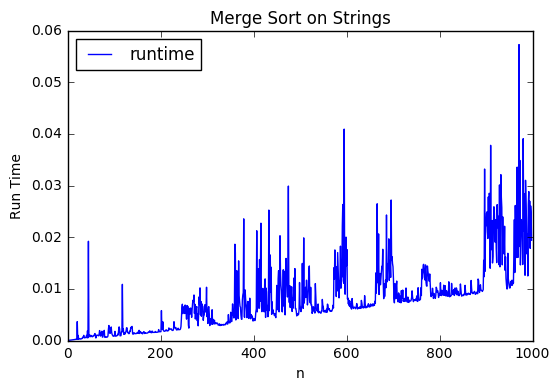

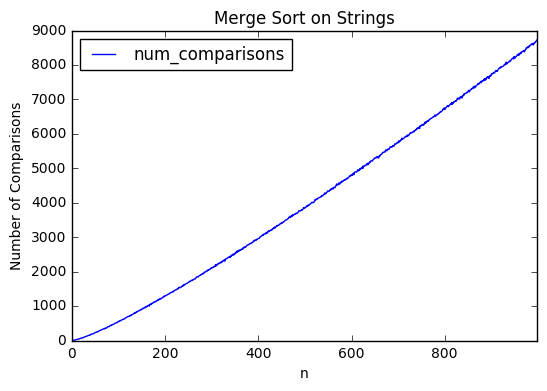

In [507]:
string_stats_merge_df.reset_index().plot(x='index', y='runtime')
plt.title("Merge Sort on Strings")
plt.ylabel("Run Time")
plt.xlabel("n")
plt.axis([0,1000,0,0.06])
string_stats_merge_df.reset_index().plot(x='index', y='num_comparisons')
plt.title("Merge Sort on Strings")
plt.ylabel("Number of Comparisons")
plt.xlabel("n")

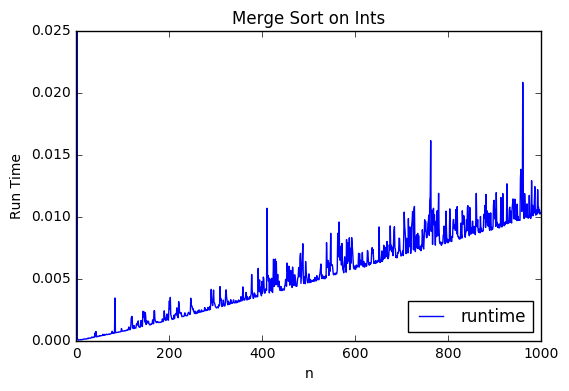

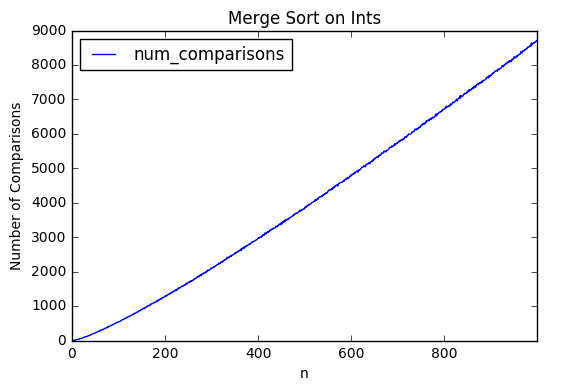

In [504]:
int_stats_merge_df.reset_index().plot(x='index', y='runtime')
plt.title("Merge Sort on Ints")
plt.ylabel("Run Time")
plt.xlabel("n")
plt.axis([0,1000,0,0.025])
int_stats_merge_df.reset_index().plot(x='index', y='num_comparisons')
plt.title("Merge Sort on Ints")
plt.ylabel("Number of Comparisons")
plt.xlabel("n")

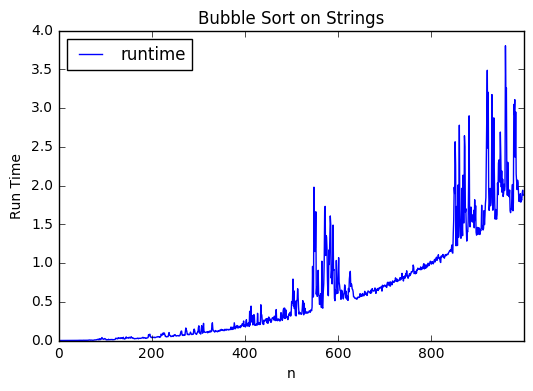

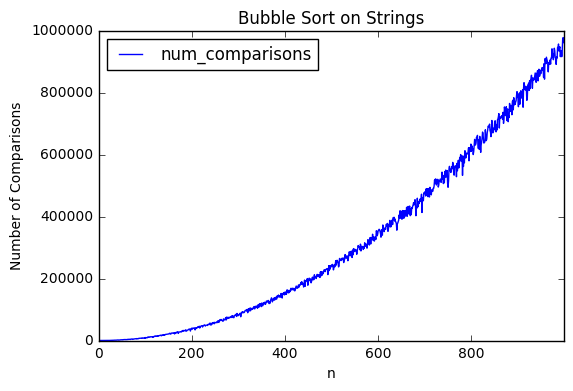

In [494]:
string_stats_bubble_df.reset_index().plot(x='index', y='runtime')
plt.title("Bubble Sort on Strings")
plt.ylabel("Run Time")
plt.xlabel("n")
string_stats_bubble_df.reset_index().plot(x='index', y='num_comparisons')
plt.title("Bubble Sort on Strings")
plt.ylabel("Number of Comparisons")
plt.xlabel("n")

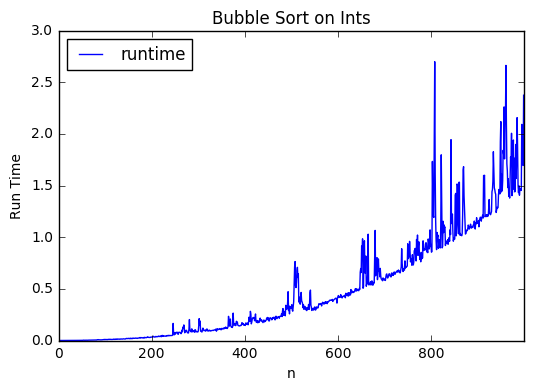

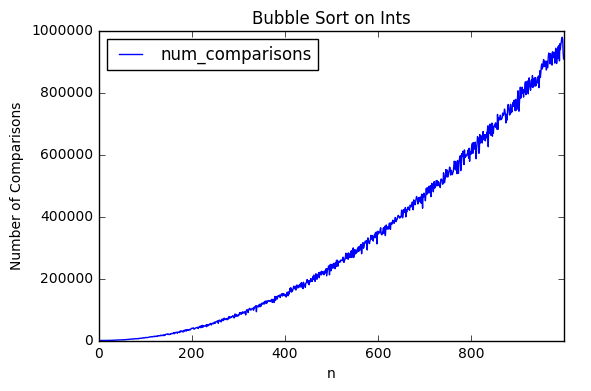

In [495]:
int_stats_bubble_df.reset_index().plot(x='index', y='runtime')
plt.title("Bubble Sort on Ints")
plt.ylabel("Run Time")
plt.xlabel("n")
int_stats_bubble_df.reset_index().plot(x='index', y='num_comparisons')
plt.title("Bubble Sort on Ints")
plt.ylabel("Number of Comparisons")
plt.xlabel("n")

- Merge Sort
    - It is clear to see through the plots of the merge sort results, that the big O efficiency is n log(n). Looking at the number of comparisons, it increase at a slower rate than O(n^2), and faster than O(n).
- Bubble sort
    - Bubble sort's Big-O notation is O(n^2), and this is clear to see, especially in realtion to merge sort. The number of comparions is roughly 1 million for n = 1000, which is very accurately n^2 efficiency.